In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split

In [2]:
train_dir = "E://PDuCV//chest_xray//train"
test_dir = "E://PDuCV//chest_xray//test"
val_dir = "E://PDuCV//chest_xray//val"

In [3]:
# data_gen = ImageDataGenerator(rescale = 1./255,
#                              shear_range = 0.2, 
#                              zoom_range = 0.15,
#                              rotation_range = 7,
#                              width_shift_range=0.15,  
#                              height_shift_range=0.1,  
#                              horizontal_flip=True)

# train_gen = data_gen.flow_from_directory(train_dir,
#                                            target_size = (300, 300),
#                                            batch_size = 32,
#                                            shuffle = True,
#                                            color_mode = 'grayscale',
#                                             class_mode = 'binary')

# val_test_gen = ImageDataGenerator(rescale = 1./255)

# val_gen = val_test_gen.flow_from_directory(val_dir,
#                                       target_size = (300, 300),
#                                       batch_size = 32,
#                                       shuffle = False,
#                                       color_mode = 'grayscale',
#                                       class_mode = 'binary')

# test_gen = val_test_gen.flow_from_directory(test_dir,
#                                       target_size = (300, 300),
#                                       batch_size = 32,
#                                       shuffle = False,
#                                       color_mode = 'grayscale',
#                                       class_mode = 'binary')

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255) 

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                        target_size=(64, 64),
                                                        batch_size=32,
                                                        class_mode='binary')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 4016 images belonging to 2 classes.
Found 1016 images belonging to 2 classes.
Found 824 images belonging to 2 classes.


In [5]:
cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [6]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [7]:
stop = EarlyStopping(patience = 10, monitor = 'val_loss')

In [8]:
cnn.fit(x = training_set, validation_data = validation_generator, epochs = 100, shuffle = False, callbacks = [stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 126 steps, validate for 32 steps
Epoch 1/100
126/126 [==============================] - 70s 556ms/step - loss: 0.3760 - accuracy: 0.8352 - val_loss: 0.1964 - val_accuracy: 0.9065
Epoch 2/100
126/126 [==============================] - 69s 544ms/step - loss: 0.2496 - accuracy: 0.8964 - val_loss: 0.1673 - val_accuracy: 0.9222
Epoch 3/100
126/126 [==============================] - 87s 694ms/step - loss: 0.2335 - accuracy: 0.9031 - val_loss: 0.1763 - val_accuracy: 0.9262
Epoch 4/100
126/126 [==============================] - 67s 528ms/step - loss: 0.1925 - accuracy: 0.9196 - val_loss: 0.1556 - val_accuracy: 0.9341
Epoch 5/100
126/126 [==============================] - 66s 523ms/step - loss: 0.1993 - accuracy: 0.9216 - val_loss: 0.1514 - val_accuracy: 0.9380
Epoch 6/100
126/126 [==============================] - 66s 521ms/step - loss: 0.1865 - accuracy: 0.9243 - val_loss: 0.1681 - val_accuracy: 0.9331
Epoch 7/100
126/126 [==========

In [9]:
history = pd.DataFrame(cnn.history.history)

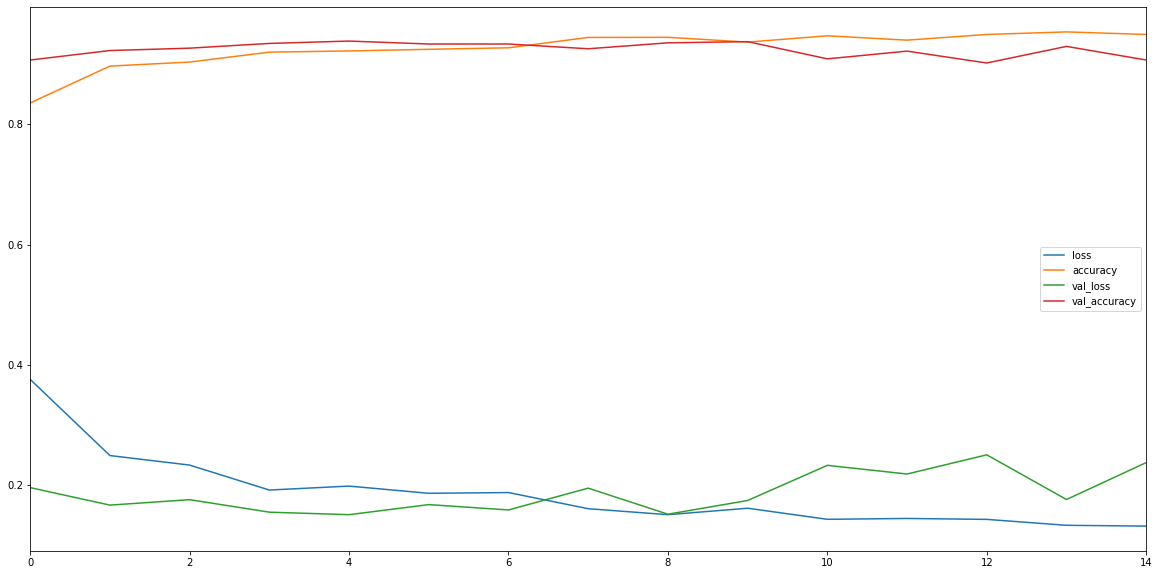

In [10]:
plt.rcParams["figure.figsize"] = (20,10)
history.plot()

In [12]:
print("Testing accuracy : ",cnn.evaluate(test_set)[1]*100)

  ...
    to  
  ['...']
26/26 [==============================] - 9s 353ms/step - loss: 0.2680 - accuracy: 0.8932
Testing accuracy :  89.3203854560852


In [15]:
predictions_test = (cnn.predict(test_set,verbose=True) > 0.5).astype("int32")

26/26 [==============================] - 9s 344ms/step
